In [2]:
from collections import namedtuple

Damage = namedtuple("Damage", ['physical', 'energy', 'psionic'])
Defenses = namedtuple("Defenses", ['armor', 'resistance', 'will'])

In [3]:
import numpy as np

b = np.arctanh(0.9)/100
print("b = {}".format(b))

def f(d):
    return -0.5 * np.tanh(b * d) + 1

def values(defen):
    return {
        'physical': defen.armor + defen.resistance/2 + defen.will/4,
        'energy': defen.armor/4 + defen.resistance + defen.will/2,
        'psionic': defen.armor/2 + defen.resistance/4 + defen.will,
    }

def multiplier(defen):
    vals = values(defen)
    return {k: f(vals[k]) for k in vals}

def effectiveness(defen):
    mult = multiplier(defen)
    return {k: 1-mult[k] for k in mult}

def total_damage(dmg, defen):
    mult = multiplier(defen)
    return (
        dmg.physical * mult['physical'] +
        dmg.energy * mult['energy'] +
        dmg.psionic * mult['psionic']
    )

b = 0.014722194895832203


In [4]:
defen = Defenses(armor=15, resistance=40, will=22)
print("||Physical|Energy|Psionic|")
print("|---|---|---|---|")
vs = values(defen)
print(f"|Value|{vs['physical']}|{vs['energy']}|{vs['psionic']}|")
mult = multiplier(defen)
print(f"|Dmg Eff|{mult['physical']:0.1%}|{mult['energy']:0.1%}|{mult['psionic']:0.1%}|")
effect = effectiveness(defen)
print(f"|Def Eff|{effect['physical']:0.1%}|{effect['energy']:0.1%}|{effect['psionic']:0.1%}|")

base = 120
print("|Raw|Dmg Eff|Dmg Eff %|")
print("|---|---|---|")
for (name, dmg) in [
    ('Pure', None),
    ('Physical',  Damage(physical=base, energy=0, psionic=0)),
    ('Energy', Damage(physical=0, energy=base, psionic=0)),
    ('Psionic', Damage(physical=0, energy=0, psionic=base)),

    ('Dual-Hybrid', None),
    ('Physical/Energy', Damage(physical=base/2, energy=base/2, psionic=0)),
    ('Physical/Psionic', Damage(physical=base/2, energy=0, psionic=base/2)),
    ('Psionic/Energy', Damage(physical=0, energy=base/2, psionic=base/2)),

    ('Tri-Hybrid', None),
    ('Physical/Energy/Psionic', Damage(physical=base/3, energy=base/3, psionic=base/3)),
]:
    if dmg:
        tot = total_damage(dmg, defen)
        print(f"|{name}|{tot:0.0f}|{tot/base:0.1%}|")
    else: # Sub-heading
        print(f"|**{name}**|")

||Physical|Energy|Psionic|
|---|---|---|---|
|Value|40.5|54.75|39.5|
|Dmg Eff|73.3%|66.6%|73.8%|
|Def Eff|26.7%|33.4%|26.2%|
|Raw|Dmg Eff|Dmg Eff %|
|---|---|---|
|**Pure**|
|Physical|88|73.3%|
|Energy|80|66.6%|
|Psionic|89|73.8%|
|**Dual-Hybrid**|
|Physical/Energy|84|70.0%|
|Physical/Psionic|88|73.5%|
|Psionic/Energy|84|70.2%|
|**Tri-Hybrid**|
|Physical/Energy/Psionic|85|71.2%|


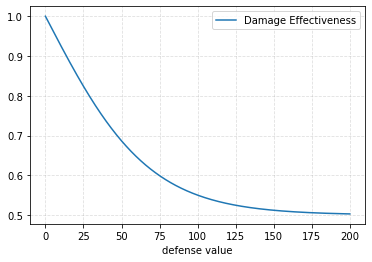

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.linspace(0, 200, 1000)


plt.plot(x, [f(a) for a in x], label="Damage Effectiveness")
plt.grid(alpha=.4,linestyle='--')
plt.xlabel('defense value')
plt.legend()